###1. What is a Support Vector Machine (SVM)?
SVM is a supervised learning algorithm that finds the optimal hyperplane maximizing the margin between classes.

###2. What is the difference between Hard Margin and Soft Margin SVM?
Hard margin allows no misclassification; soft margin allows errors using a penalty term.

###3. What is the mathematical intuition behind SVM?
It optimizes a margin-maximization problem subject to classification constraints.

###4. What is the role of Lagrange Multipliers in SVM?
They convert constrained optimization into a dual problem for efficient solving.

###5. What are Support Vectors in SVM?
They are data points closest to the hyperplane that define the margin.

###6. What is a Support Vector Classifier (SVC)?
SVC is the SVM variant used for classification tasks.

###7. What is a Support Vector Regressor (SVR)?
SVR predicts continuous values while maintaining a margin of tolerance.

###8. What is the Kernel Trick in SVM?
It maps data to higher dimensions to handle non-linear separations without explicit transformation.

###9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
Linear for simple data, Polynomial for curved boundaries, RBF for complex non-linear patterns.

###10. What is the effect of the C parameter in SVM?
C controls the trade-off between margin width and classification errors.

###11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma controls the influence range of a single data point.

###12. What is the Naïve Bayes classifier, and why is it called "Naive"?
It applies Bayes’ theorem assuming feature independence, hence “naive”.

###13. What is Bayes' Theorem?
It calculates posterior probability using prior probability and likelihood.

###14. Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes.
Gaussian for continuous data, Multinomial for counts, Bernoulli for binary features.

###15. When should you use Gaussian Naïve Bayes over other variants?
When features are continuous and normally distributed.

###16. What are the key assumptions made by Naïve Bayes?
Features are conditionally independent given the class.

###17. What are the advantages and disadvantages of Naïve Bayes?
Fast and scalable, but independence assumption is often unrealistic.

###18. Why is Naïve Bayes a good choice for text classification?
It handles high-dimensional sparse data efficiently.

###19. Compare SVM and Naive Bayes for classification tasks.
SVM is more accurate but slower; Naïve Bayes is faster but less expressive.

###20. How does Laplace Smoothing help in Naïve Bayes?
It prevents zero probabilities by adding a small constant to counts.

In [1]:
#21 - Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

1.0


In [2]:
#22 - Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel="linear")
svm_rbf = SVC(kernel="rbf")

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

print(accuracy_score(y_test, svm_linear.predict(X_test)))
print(accuracy_score(y_test, svm_rbf.predict(X_test)))

1.0
0.8055555555555556


In [3]:
#23 - Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
print(mean_squared_error(y_test, svr.predict(X_test)))

1.3320115421348744


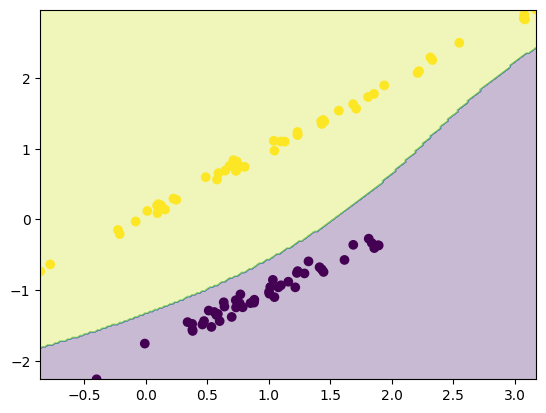

Decision boundary plotted


In [4]:
#24 - Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
model = SVC(kernel="poly", degree=3)
model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 200),
                     np.linspace(X[:,1].min(), X[:,1].max(), 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

print("Decision boundary plotted")

In [5]:
#25 - Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.9736842105263158


In [6]:
#26 - Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = fetch_20newsgroups(subset="train", categories=["sci.space", "rec.autos"])
X = CountVectorizer().fit_transform(data.data)
y = data.target

model = MultinomialNB()
model.fit(X, y)
print(model.score(X, y))

1.0


In [7]:
#27 - Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

for c in [0.1, 1, 10]:
    model = SVC(C=c)
    model.fit(X, y)
    print(f"C={c}, Accuracy={model.score(X, y)}")

C=0.1, Accuracy=0.6192080876158382
C=1, Accuracy=0.9755686604886268
C=10, Accuracy=1.0


In [8]:
#28 - Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

X, y = make_classification(n_features=10, random_state=42)
X = (X > 0).astype(int)

model = BernoulliNB()
model.fit(X, y)
print(model.score(X, y))

0.95


In [9]:
#29 - Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

svm = SVC()
svm.fit(X_train, y_train)
print(accuracy_score(y_test, svm.predict(X_test)))

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svm.fit(X_train_s, y_train)
print(accuracy_score(y_test, svm.predict(X_test_s)))

0.9473684210526315
0.9824561403508771


In [10]:
#30 - Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

model1 = GaussianNB(var_smoothing=1e-9)
model2 = GaussianNB(var_smoothing=1e-2)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print(accuracy_score(y_test, model1.predict(X_test)))
print(accuracy_score(y_test, model2.predict(X_test)))

0.9736842105263158
0.9473684210526315


In [11]:
#31 - Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn.model_selection import GridSearchCV

params = {"C":[0.1,1,10], "gamma":["scale","auto"], "kernel":["rbf","linear"]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.956043956043956


In [12]:
#32 - Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification

X, y = make_classification(weights=[0.9,0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC(class_weight="balanced")
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.84


In [15]:
#33 - Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

emails = [
    "Win a free lottery now",
    "Lowest price guaranteed buy now",
    "Meeting scheduled tomorrow",
    "Project discussion at office",
    "Congratulations you won a prize",
    "Let us catch up for lunch",
    "Claim your free reward now",
    "Please review the attached document"
]

labels = [1,1,0,0,1,0,1,0]   # 1 = Spam, 0 = Not Spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.25, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(predictions)

1.0
[1 0]


In [14]:
#34 - Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

svm = SVC()
nb = GaussianNB()

svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

print(accuracy_score(y_test, svm.predict(X_test)))
print(accuracy_score(y_test, nb.predict(X_test)))

0.84
0.92


In [23]:
#35 - Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import BernoulliNB

X = np.array([
    [1,0,1,0,1,0,1,0],
    [1,1,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,1],
    [0,1,0,1,0,1,0,1],
    [1,0,1,0,1,0,1,0],
    [0,1,0,1,0,1,0,1]
])

y = np.array([1, 1, 0, 0, 1, 0])

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

model = BernoulliNB()
model.fit(X_new, y)

print(model.score(X_new, y))

1.0


In [17]:
#36 - Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print(accuracy_score(y_test, ovr.predict(X_test)))
print(accuracy_score(y_test, ovo.predict(X_test)))

0.7111111111111111
0.7777777777777778


In [18]:
#37 - Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for k in ["linear","poly","rbf"]:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(k, accuracy_score(y_test, model.predict(X_test)))

linear 0.958041958041958
poly 0.9440559440559441
rbf 0.951048951048951


In [19]:
#38 - Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(5)
scores = cross_val_score(SVC(), X, y, cv=cv)
print(scores.mean())

0.9121720229777983


In [20]:
#39 - Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

model1 = GaussianNB(priors=[0.5,0.5])
model2 = GaussianNB(priors=[0.7,0.3])

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print(model1.score(X_test, y_test))
print(model2.score(X_test, y_test))

0.958041958041958
0.951048951048951


In [21]:
#40 - Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn.feature_selection import RFE

selector = RFE(SVC(kernel="linear"), n_features_to_select=5)
X_rfe = selector.fit_transform(X_train, y_train)

model = SVC()
model.fit(X_rfe, y_train)
print(model.score(selector.transform(X_test), y_test))

0.9230769230769231


In [25]:
#41 - Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(precision_score(y_test, pred, average="binary"))
print(recall_score(y_test, pred, average="binary"))
print(f1_score(y_test, pred, average="binary"))

0.9361702127659575
0.9887640449438202
0.9617486338797814


In [28]:
#42 - Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

nb = GaussianNB()
nb.fit(X_train, y_train)

probs = nb.predict_proba(X_test)
print(log_loss(y_test, probs))

0.5041791651287795


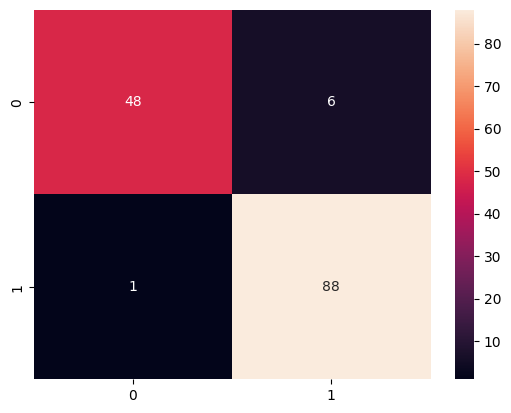

[[48  6]
 [ 1 88]]


In [26]:
#43 - Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svm.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(cm)

In [31]:
#44 - Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

svr = SVR()
svr.fit(X_train, y_train)

print(mean_absolute_error(y_test, svr.predict(X_test)))

0.12048223629761325


In [29]:
#45 - Write a Python program to train a Naive Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, nb.predict_proba(X_test)[:,1]))

0.9935497295047857


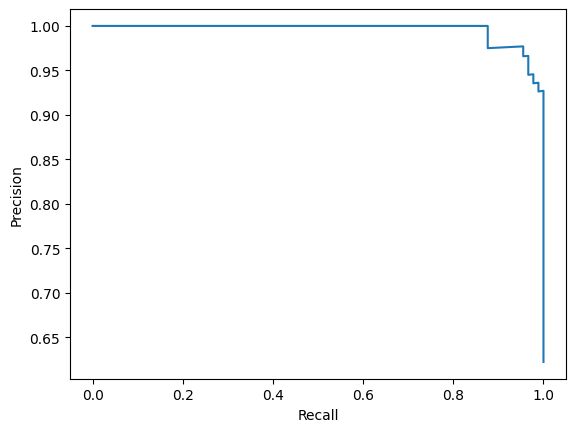

Precision-Recall curve plotted


In [30]:
#46 - Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

from sklearn.metrics import precision_recall_curve

probs = svm.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision-Recall curve plotted")